# Data Analysis Notebook

In this notebook, we analyze the clean datasets in order to answer three primary questions:

- What movie genres generate the highest ROI?
- What time of year is best to release a movie?
- Which directors generate the highest grossings?

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

First, let's load the clean files we saved previously.

In [2]:
#load clean data sets
title_budgets_df = pd.read_csv('data/cleaned_title_budgets_df.csv', index_col=0)
directors_df = pd.read_csv('data/cleaned_directors_df.csv', index_col=0)

In [3]:
title_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,553.257713,Horror,Dec,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,136.0,"Action,Adventure,Fantasy",154.667286,Action,May,2011
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",-57.210757,Action,Jun,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",324.384139,Action,May,2015
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018


In [4]:
directors_df.head()

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category
12,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,5.0,director
13,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt1592569,5.0,director
14,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2590280,5.0,director
15,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt8421806,5.0,director
48,nm0064023,Bryan Beasley,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162",tt3501180,2.0,director


## Data Preparation

Before we start analyzing ROI, let's explore this column specifically and see if we need to do any further data preparation before proceeding.

In [5]:
title_budgets_df.shape

(2263, 12)

In [6]:
title_budgets_df['ROI'].describe()

count     2263.000000
mean       304.050029
std       1561.378227
min       -100.000000
25%        -62.614608
50%         68.449583
75%        274.025369
max      41556.474000
Name: ROI, dtype: float64

ROI has a standard deviation of 1,500 and a maximum value of ~41,000. The mean of 303 is significantly higher than the median of 68. Looking at these statistics, we may need to eliminate outliers at the right end of our data.

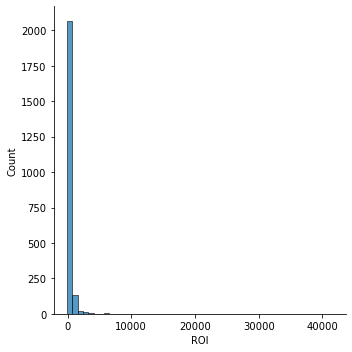

In [7]:
ax = sns.displot(data = title_budgets_df, x = 'ROI', bins=50);

The histogram confirms the data is skewed to the right. To make our analysis more useful, let's see what the data would look like eliminating all ROI values above 800.

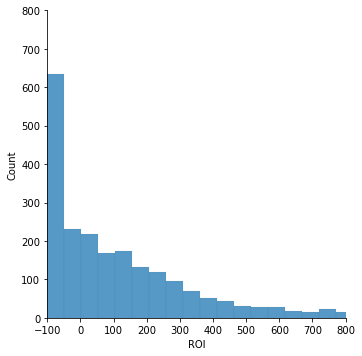

In [8]:
ax = sns.displot(data = title_budgets_df, x = 'ROI')
ax.set(ylim=(0,800), xlim=(-100,800));

The data is still skewed right, but less so. We will create a new DataFrame eliminating all rows with ROI above 800.

In [9]:
#create new dataframe of ROI values below 800

filtered_title_budgets_df = title_budgets_df[title_budgets_df['ROI']<1000]
filtered_title_budgets_df.shape

(2137, 12)

By eliminating ROI values above 800, our dataset went from 2264 rows to 2092 rows, so we have preserved most of our overall data. Now that we have a cleaner ROI data set to work with, let's use this filtered_title_budgets_df to answer some of our questions.

## Data Analysis

### What genre generates the highest ROI?

The first question we would like to explore is how genre relates to a movie's ROI. To do this, we need to group the movies into genres and plot against ROI.

In [10]:
# group movies by primary_genre in a new dataframe, and sort by ROI.

genres_ROI_df = filtered_title_budgets_df.groupby(['primary_genre']).mean().reset_index()
genres_ROI_df.sort_values(by = ['ROI'], ascending = False, inplace=True)
genres_ROI_df

,primary_genre,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year
13,Mystery,2.839167e+07,5.949053e+07,1.226127e+08,109.000000,175.961107,2006.333333
1,Adventure,7.013421e+07,7.965524e+07,2.174923e+08,100.242105,160.006354,2012.078947
2,Animation,4.545000e+07,7.557809e+07,1.840008e+08,87.500000,157.507089,2009.250000
12,Musical,4.020000e+07,7.501598e+07,1.910826e+08,118.000000,154.335363,2010.333333
0,Action,7.166806e+07,7.678748e+07,2.090653e+08,110.314501,135.919825,2012.097928
4,Comedy,2.081437e+07,2.989094e+07,5.412387e+07,100.325700,132.726910,2011.282443
3,Biography,2.316406e+07,2.961122e+07,5.566590e+07,108.702899,121.689106,2012.724638
7,Drama,1.956443e+07,2.207953e+07,4.414620e+07,103.387892,108.660554,2009.114350
10,Horror,1.720936e+07,2.352837e+07,5.665824e+07,91.981132,108.270360,2010.764151
15,Sci-Fi,2.855636e+07,3.887608e+07,8.882676e+07,82.090909,86.432433,2004.272727


In [11]:
## create a function for setting a custom color palette that highlights the max value

def custom_palette(series, max_color = 'turquoise', other_color = 'lightgrey'):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

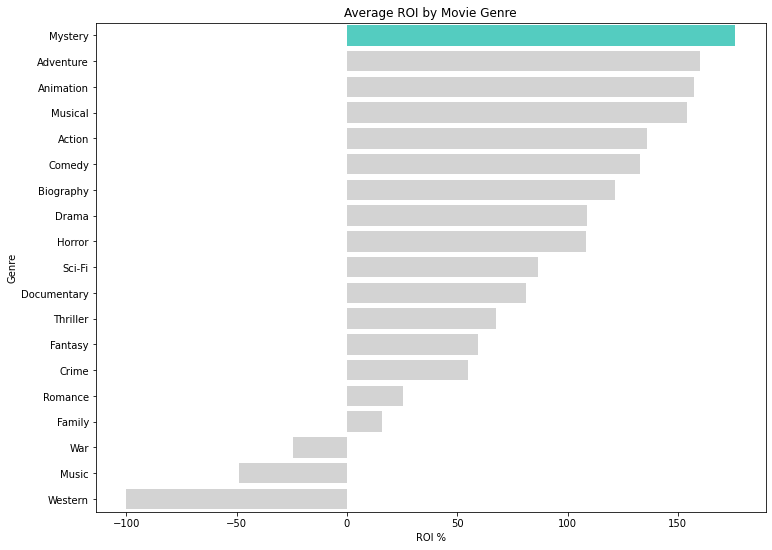

In [12]:
## plot average ROI by movie genre
plt.figure(figsize=(12,9))
ax = sns.barplot(x = 'ROI', y = 'primary_genre', 
            data=genres_ROI_df, 
            palette=custom_palette(genres_ROI_df['ROI']))
ax.set_title('Average ROI by Movie Genre')
ax.set(xlabel='ROI %', ylabel= 'Genre');

It looks like Mystery is the movie genre with the highest return on investment. Let's investigate the data a little more to check if this is a logical conclusion.

In [13]:
filtered_title_budgets_df['primary_genre'].value_counts()

Action         531
Drama          446
Comedy         393
Adventure      190
Biography      138
Documentary    132
Crime          118
Horror         106
Animation       20
Thriller        20
Sci-Fi          11
Fantasy          7
Family           7
Mystery          6
Romance          5
Musical          3
Music            2
War              1
Western          1
Name: primary_genre, dtype: int64

In [46]:
filtered_title_budgets_df[filtered_title_budgets_df['primary_genre']=='Mystery']

,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,month_num,quarter_released,movie_length
626,"Feb 19, 2010",Shutter Island,80000000.0,128012934.0,299461782.0,tt1130884,138.0,"Mystery,Thriller",274.327227,Mystery,Feb,2010,2,Q1,long
1254,"Jun 10, 2011",Super 8,50000000.0,127004179.0,257972745.0,tt1650062,112.0,"Mystery,Sci-Fi,Thriller",415.945490,Mystery,Jun,2011,6,Q2,normal
2440,"Mar 18, 2011",Limitless,27000000.0,79249455.0,155564919.0,tt1219289,105.0,"Mystery,Sci-Fi,Thriller",476.166367,Mystery,Mar,2011,3,Q1,normal
3983,"Jun 15, 1979",Prophecy,12000000.0,22673340.0,22673340.0,tt3952226,119.0,Mystery,88.944500,Mystery,Jun,1979,6,Q2,long
6327,"Aug 28, 2015",Windsor Drive,850000.0,3256.0,3256.0,tt2311428,90.0,"Mystery,Thriller",-99.616941,Mystery,Aug,2015,8,Q3,normal
6490,"Apr 3, 2012",Enter Nowhere,500000.0,0.0,0.0,tt1631707,90.0,"Mystery,Sci-Fi,Thriller",-100.000000,Mystery,Apr,2012,4,Q2,normal


There are only 6 mystery movies in our dataset, compared to action with over 500 movies. A handful of popular mystery movies are skewing that genre's overall average. Due to this, let's also analyze the 10 genres that appear most frequently.

In [15]:
## add a count column to determine which genres appear most frequently, and sort by the new count column.

genres_ROI_df['count'] = filtered_title_budgets_df.groupby(['primary_genre']).count().reset_index()['movie']
genres_ROI_df.sort_values(by = ['count'], ascending = False, inplace=True)
genres_ROI_df

,primary_genre,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year,count
0,Action,7.166806e+07,7.678748e+07,2.090653e+08,110.314501,135.919825,2012.097928,531
7,Drama,1.956443e+07,2.207953e+07,4.414620e+07,103.387892,108.660554,2009.114350,446
4,Comedy,2.081437e+07,2.989094e+07,5.412387e+07,100.325700,132.726910,2011.282443,393
1,Adventure,7.013421e+07,7.965524e+07,2.174923e+08,100.242105,160.006354,2012.078947,190
3,Biography,2.316406e+07,2.961122e+07,5.566590e+07,108.702899,121.689106,2012.724638,138
6,Documentary,1.869396e+07,2.211853e+07,4.076720e+07,73.628788,81.254241,2005.931818,132
5,Crime,2.266237e+07,2.253192e+07,4.790515e+07,106.686441,54.957553,2011.194915,118
10,Horror,1.720936e+07,2.352837e+07,5.665824e+07,91.981132,108.270360,2010.764151,106
2,Animation,4.545000e+07,7.557809e+07,1.840008e+08,87.500000,157.507089,2009.250000,20
16,Thriller,1.964000e+07,1.703294e+07,3.465570e+07,90.500000,67.768199,2005.050000,20


In [16]:
# create a dataframe with just the top 10 genres, then sort by ROI.
frequent_genres_df = genres_ROI_df[0:10]
frequent_genres_df.sort_values(by = ['ROI'], ascending = False, inplace=True)
frequent_genres_df

<ipython-input-16-9bb0e9121d94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frequent_genres_df.sort_values(by = ['ROI'], ascending = False, inplace=True)


,primary_genre,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year,count
1,Adventure,7.013421e+07,7.965524e+07,2.174923e+08,100.242105,160.006354,2012.078947,190
2,Animation,4.545000e+07,7.557809e+07,1.840008e+08,87.500000,157.507089,2009.250000,20
0,Action,7.166806e+07,7.678748e+07,2.090653e+08,110.314501,135.919825,2012.097928,531
4,Comedy,2.081437e+07,2.989094e+07,5.412387e+07,100.325700,132.726910,2011.282443,393
3,Biography,2.316406e+07,2.961122e+07,5.566590e+07,108.702899,121.689106,2012.724638,138
7,Drama,1.956443e+07,2.207953e+07,4.414620e+07,103.387892,108.660554,2009.114350,446
10,Horror,1.720936e+07,2.352837e+07,5.665824e+07,91.981132,108.270360,2010.764151,106
6,Documentary,1.869396e+07,2.211853e+07,4.076720e+07,73.628788,81.254241,2005.931818,132
16,Thriller,1.964000e+07,1.703294e+07,3.465570e+07,90.500000,67.768199,2005.050000,20
5,Crime,2.266237e+07,2.253192e+07,4.790515e+07,106.686441,54.957553,2011.194915,118


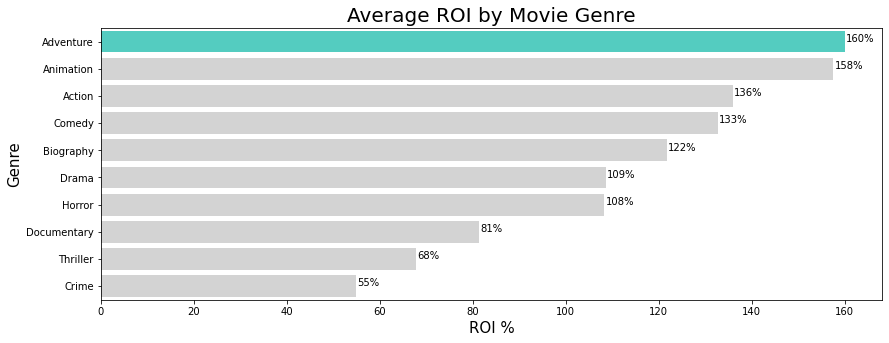

In [17]:
plt.figure(figsize=(14,5))
ax = sns.barplot(x = 'ROI', y = 'primary_genre', 
            data=frequent_genres_df, 
            palette=custom_palette(frequent_genres_df['ROI']))
ax.set_title('Average ROI by Movie Genre', fontsize=20)
ax.set_xlabel('ROI %', fontsize=15)
ax.set_ylabel('Genre', fontsize=15);

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = width+.25, 
            y = p.get_y()+(height/2),
            s = '{:.0f}%'.format(width)) 
plt.savefig("images\ROI_by_genre.png")

Looking at the top 10 most frequent movie genres, animation films have the greatest ROI, followed closely by adventure films. How does this ranking compare to upfront investment required? 

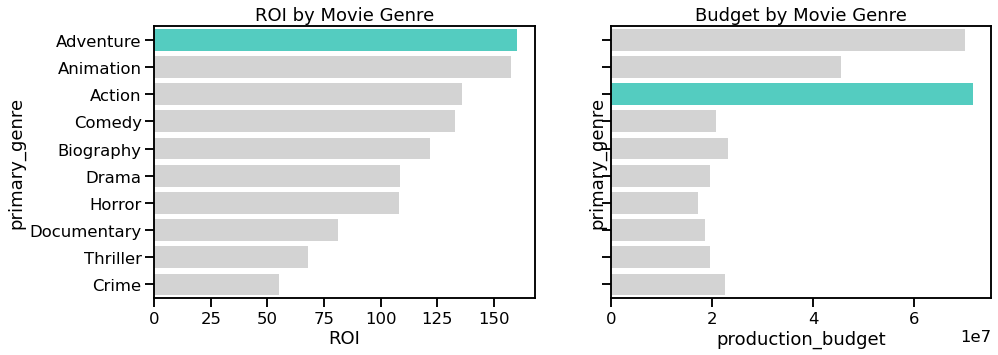

In [67]:
sns.set_context('talk')

fig, axes = plt.subplots(1,2, sharey=True, figsize=(15,5))
axes[0].set_title('ROI by Movie Genre')
axes[1].set_title('Budget by Movie Genre')


sns.barplot(ax=axes[0], x='ROI', y='primary_genre',
           data=frequent_genres_df, palette=custom_palette(frequent_genres_df['ROI']))

sns.barplot(ax=axes[1], x='production_budget', y='primary_genre',
           data=frequent_genres_df, palette=custom_palette(frequent_genres_df['production_budget']))
plt.savefig("images\ROI_budget_genre.png");


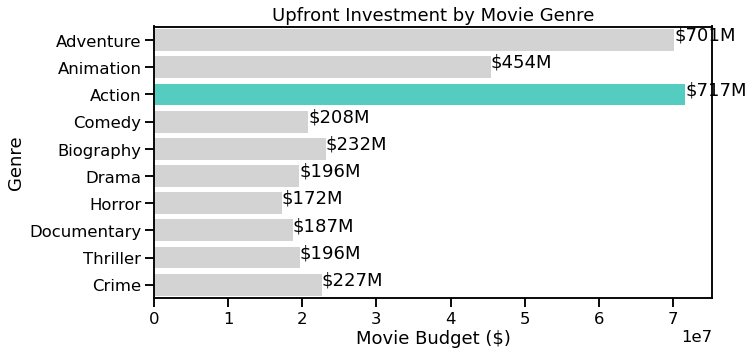

In [61]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x = 'production_budget', y = 'primary_genre', 
            data=frequent_genres_df, 
            palette=custom_palette(frequent_genres_df['production_budget']))
ax.set_title('Upfront Investment by Movie Genre')
ax.set(xlabel='Movie Budget ($)', ylabel= 'Genre');

for p in ax.patches:
    height = p.get_height() 
    width = p.get_width() 
    ax.text(x = width+.25, 
            y = p.get_y()+(height/2),
            s = '${:.0f}M'.format(width/100000)) 


Animation films require much less upfront investment than the other top ROI genres, adventure and action. Therefore, we recommend Microsoft's studio begin making animation films.

### When is the best time to release a movie?

Next, we are interested in learning more about how ROI and grossings are affected by release date of the film. Let's start by finding which release month is most profitable.

In [20]:
filtered_title_budgets_df['release_month'].value_counts()

Dec    261
Oct    204
Sep    188
Mar    187
Apr    187
Aug    181
Nov    175
Jun    167
Jul    157
Feb    151
May    147
Jan    132
Name: release_month, dtype: int64

In [21]:
# create a new column for month number to sort months in descending order.
filtered_title_budgets_df["month_num"] = pd.to_datetime(filtered_title_budgets_df.release_month, format='%b', errors='coerce').dt.month


<ipython-input-21-26fb317ffb7e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_title_budgets_df["month_num"] = pd.to_datetime(filtered_title_budgets_df.release_month, format='%b', errors='coerce').dt.month


In [22]:
# group the dataframe by release month

profit_by_month_df = filtered_title_budgets_df.groupby(['release_month']).mean().reset_index()
profit_by_month_df = profit_by_month_df.sort_values(by="month_num")
profit_by_month_df

,release_month,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year,month_num
4,Jan,2.681338e+07,2.634585e+07,5.792984e+07,100.196970,128.504871,2010.522727,1.0
3,Feb,3.439358e+07,4.126645e+07,8.971014e+07,99.814570,137.223081,2011.132450,2.0
7,Mar,4.217446e+07,4.651020e+07,1.118018e+08,101.315508,116.293575,2011.935829,3.0
0,Apr,3.010791e+07,3.480936e+07,8.848156e+07,101.636364,106.113316,2010.593583,4.0
8,May,6.039365e+07,7.008897e+07,1.847412e+08,103.204082,140.965626,2011.136054,5.0
6,Jun,5.533694e+07,7.465450e+07,1.815736e+08,103.131737,173.859876,2009.850299,6.0
5,Jul,4.781443e+07,5.217695e+07,1.343727e+08,103.133758,142.328061,2010.401274,7.0
1,Aug,2.872166e+07,3.329423e+07,6.858552e+07,98.154696,108.684767,2009.696133,8.0
11,Sep,2.490648e+07,2.532807e+07,5.502346e+07,100.946809,106.847936,2011.063830,9.0
10,Oct,2.551096e+07,2.387967e+07,5.832756e+07,102.024510,80.998244,2010.259804,10.0


<Figure size 864x648 with 0 Axes>

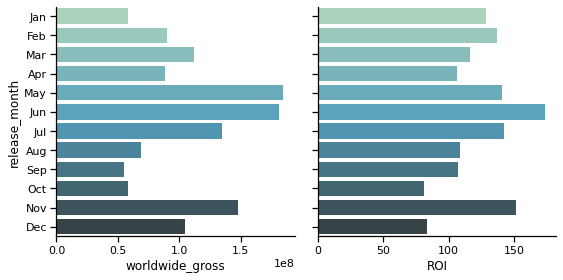

In [23]:
## TO PROBABLY DELETE!!
sns.set_context("notebook", font_scale=1)
plt.figure(figsize=(12,9))
g = sns.PairGrid(profit_by_month_df, y_vars=['release_month'], 
                 x_vars=['worldwide_gross', 'ROI'], height=4, palette='GnBu_d')
g.map(sns.barplot, color=".3");

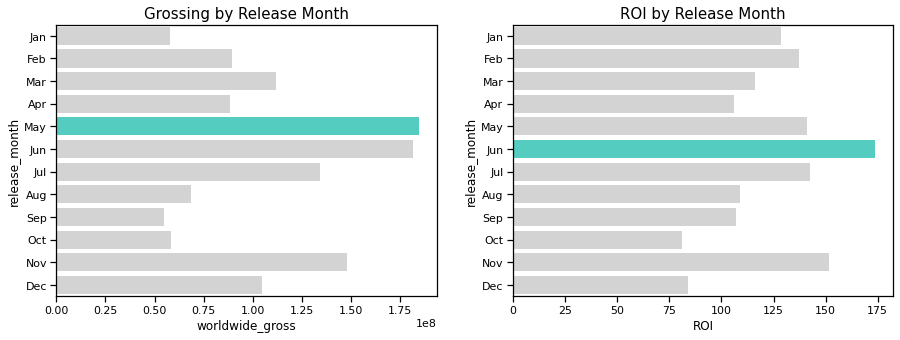

In [24]:
data = profit_by_month_df.sort_values(by = 'month_num')

fig, axes = plt.subplots(1,2, sharey=False, figsize=(15,5))
axes[0].set_title('Grossing by Release Month', fontsize=15)
axes[1].set_title('ROI by Release Month', fontsize=15)

sns.barplot(ax=axes[0], x='worldwide_gross', y='release_month',
           data=data, palette=custom_palette(profit_by_month_df['worldwide_gross']))

sns.barplot(ax=axes[1], x='ROI', y='release_month',
           data=data, palette=custom_palette(profit_by_month_df['ROI']));

Based on this analysis, it looks like the movie release month with the best ROI is November. What if we look at ROI based on the quarter of release?

In [25]:
## Create a new column for quarter.
def quarter_released(month):
    if (month <=3):
        return 'Q1'
    elif(month <=6):
        return 'Q2'
    elif(month <=9):
        return 'Q3'
    else:
        return 'Q4'


In [26]:
filtered_title_budgets_df['quarter_released'] = filtered_title_budgets_df['month_num'].apply(quarter_released)
filtered_title_budgets_df.head()

<ipython-input-26-c37ab5f8ea64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_title_budgets_df['quarter_released'] = filtered_title_budgets_df['month_num'].apply(quarter_released)


,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,month_num,quarter_released
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,553.257713,Horror,Dec,2009,12,Q4
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,136.0,"Action,Adventure,Fantasy",154.667286,Action,May,2011,5,Q2
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",-57.210757,Action,Jun,2019,6,Q2
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",324.384139,Action,May,2015,5,Q2
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018,4,Q2


In [27]:
profit_by_quarter_df = filtered_title_budgets_df.groupby(['quarter_released']).mean().reset_index()
profit_by_quarter_df = profit_by_quarter_df.sort_values(by="quarter_released")
profit_by_quarter_df

,quarter_released,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year,month_num
0,Q1,3.536047e+07,3.916233e+07,8.957427e+07,100.519149,126.447291,2011.280851,2.117021
1,Q2,4.740382e+07,5.844258e+07,1.477561e+08,102.594810,138.921630,2010.504990,4.960080
2,Q3,3.305685e+07,3.608311e+07,8.337433e+07,100.638783,118.070076,2010.395437,8.058935
3,Q4,3.590273e+07,4.087625e+07,1.018973e+08,103.576562,101.491352,2010.601562,11.089063


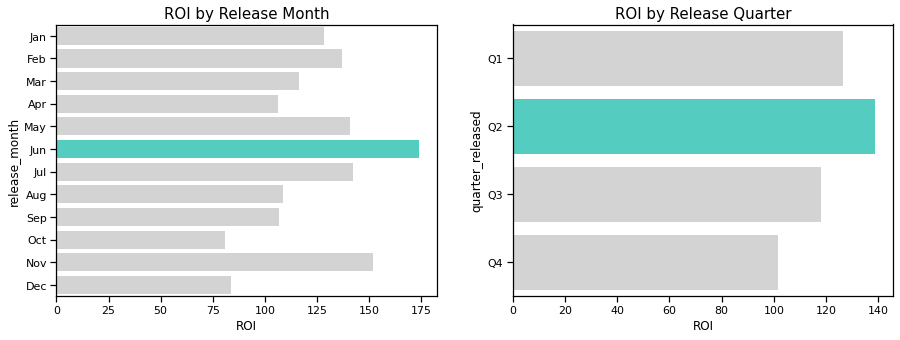

In [28]:

fig, axes = plt.subplots(1,2, sharey=False, figsize=(15,5))
axes[0].set_title('ROI by Release Month', fontsize=15)
axes[1].set_title('ROI by Release Quarter', fontsize=15)

sns.barplot(ax=axes[0], x='ROI', y='release_month',
           data=profit_by_month_df, palette=custom_palette(profit_by_month_df['ROI']))

sns.barplot(ax=axes[1], x='ROI', y='quarter_released',
           data=profit_by_quarter_df, palette=custom_palette(profit_by_quarter_df['ROI']))
plt.savefig("images\ROI_by_release.png");

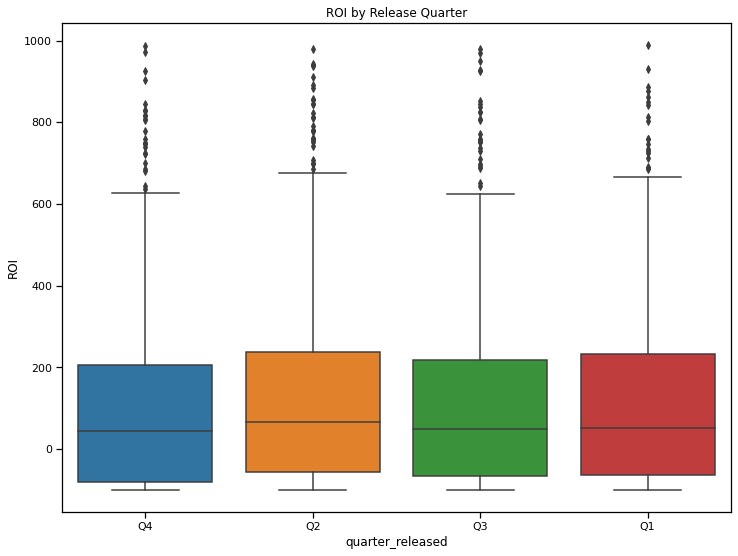

In [29]:
plt.figure(figsize=(12,9))
ax = sns.boxplot(data=filtered_title_budgets_df, x='quarter_released', y='ROI')
ax.set_title('ROI by Release Quarter');

Based on our analysis, Q2 has the highest average ROI per quarter. This could make sense, since new movies released at this time can take advantage of summer vacation audiences.

### Who are the highest grossing directors?

In order to figure out which directors brought in the most money, we will need to merge our two dataframes, directors_df and title_budgets_df.

In [30]:
## merge directors_df with title_budgets_df to get all title and budget information.

directors_title_budgets_df = directors_df.merge(filtered_title_budgets_df, how = 'left', left_on = 'tconst', right_on = 'tconst')
directors_title_budgets_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,month_num,quarter_released
0,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2057445,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt1592569,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt2590280,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,nm0062879,Ruel S. Bayani,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445",tt8421806,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,nm0064023,Bryan Beasley,"director,producer,writer","tt3501180,tt1485100,tt1358897,tt1387162",tt3501180,2.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146435,nm9971456,Zheng Wei,director,NaN,tt8697720,1.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146436,nm9980896,Rama Narayanan,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8715016,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146437,nm9980896,Rama Narayanan,"director,writer","tt10127906,tt8715016,tt8919136,tt8929818",tt8919136,5.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146438,nm9981679,Samir Eshra,"director,writer,cinematographer",NaN,tt8717234,1.0,director,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
directors_title_budgets_df.isna().sum()

nconst                     0
primary_name               0
primary_profession       587
known_for_titles        4207
tconst                     0
ordering                   0
category                   0
release_date          144208
movie                 144208
production_budget     144208
domestic_gross        144208
worldwide_gross       144208
runtime_minutes       144208
genres                144208
ROI                   144208
primary_genre         144208
release_month         144208
release_year          144208
month_num             144208
quarter_released      144208
dtype: int64

We can see there were 144,000 values in or directors_df that weren't able to match to a film in title_budgets_df. Let's drop all rows with missing values for worldwide_gross, since they won't be helpful for our analysis.

In [32]:
directors_title_budgets_df.dropna(subset=['worldwide_gross'], inplace=True)
directors_title_budgets_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,month_num,quarter_released
40,nm0101047,David Bowers,"animation_department,director,writer","tt2023453,tt1650043,tt0375568,tt0424095",tt2023453,5.0,director,"Aug 3, 2012",Diary of a Wimpy Kid: Dog Days,22000000.0,49008662.0,77229695.0,94.0,"Comedy,Family",251.044068,Comedy,Aug,2012.0,8.0,Q3
41,nm0101047,David Bowers,"animation_department,director,writer","tt2023453,tt1650043,tt0375568,tt0424095",tt1650043,5.0,director,"Mar 25, 2011",Diary of a Wimpy Kid: Rodrick Rules,18000000.0,52698535.0,73695194.0,99.0,"Comedy,Family",309.417744,Comedy,Mar,2011.0,3.0,Q1
42,nm0101047,David Bowers,"animation_department,director,writer","tt2023453,tt1650043,tt0375568,tt0424095",tt6003368,5.0,director,"May 19, 2017",Diary of a Wimpy Kid: The Long Haul,22000000.0,20738724.0,35609577.0,91.0,"Comedy,Family",61.861714,Comedy,May,2017.0,5.0,Q2
45,nm0103187,Dan Bradley,"stunts,assistant_director,actor","tt0244244,tt0440963,tt1229238,tt0372183",tt1234719,5.0,director,"Nov 21, 2012",Red Dawn,65000000.0,44806783.0,48164150.0,93.0,"Action,Sci-Fi,Thriller",-25.901308,Action,Nov,2012.0,11.0,Q4
77,nm0135952,Nae Caranfil,"writer,director,actor","tt0839967,tt2017486,tt0314067,tt0175575",tt2017486,5.0,director,"Apr 17, 2014",Closer to the Moon,1500000.0,0.0,5396.0,112.0,"Comedy,Crime,Drama",-99.640267,Comedy,Apr,2014.0,4.0,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142510,nm8525942,Roqiyeh Tavakoli,"director,writer","tt6169556,tt6208138",tt6208138,5.0,director,"Oct 23, 2009",Motherhood,10000000.0,93388.0,723388.0,74.0,"Drama,Romance",-92.766120,Drama,Oct,2009.0,10.0,Q4
142815,nm7448856,Mauricio Hernandez,"producer,director,editor","tt4849322,tt8917508",tt4849322,1.0,director,"Oct 29, 2004",Birth,20000000.0,5005899.0,14603001.0,9.0,"Adventure,Documentary",-26.984995,Adventure,Oct,2004.0,10.0,Q4
143754,nm5862289,M.S. Sreenath,director,tt3107798,tt3107798,5.0,director,"Jan 25, 2008",Rambo,47500000.0,42754105.0,112214531.0,144.0,"Comedy,Drama,Thriller",136.241118,Comedy,Jan,2008.0,1.0,Q1
145837,nm7372429,Andrius Blazevicius,"writer,director,editor","tt9348578,tt5846676,tt4744442,tt4738604",tt5846676,5.0,director,"Apr 4, 1997",The Saint,90000000.0,61363304.0,169400000.0,96.0,Drama,88.222222,Drama,Apr,1997.0,4.0,Q2


Now that we have directors and their movie information in one place, there are two different ways of looking at the data. One way is to sort the DataFrame by worldwide_gross, and see who the directors are of the top movies. Or we can group the dataframe by director, and sum worldwide_gross to see which directors have made the most money overall.

**Method 1: Top Grossing Movies and their directors**

In [33]:
# sort dataFrame by worldwide_gross

directors_title_budgets_df.sort_values(by='worldwide_gross', ascending=False, inplace=True)
directors_title_budgets_df

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,month_num,quarter_released
91049,nm3786927,Atsushi Wada,director,"tt1594549,tt1775309,tt1602612",tt1775309,5.0,director,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,93.0,Horror,553.257713,Horror,Dec,2009.0,12.0,Q4
977,nm0751648,Joe Russo,"producer,director,writer","tt4154756,tt4154796,tt1843866,tt3498820",tt4154756,6.0,director,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018.0,4.0,Q2
15486,nm0751577,Anthony Russo,"producer,director,writer","tt1843866,tt4154756,tt3498820,tt4154796",tt4154756,5.0,director,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018.0,4.0,Q2
25269,nm1119880,Colin Trevorrow,"writer,producer,director","tt0369610,tt4881806,tt4572792,tt1862079",tt0369610,5.0,director,"Jun 12, 2015",Jurassic World,215000000.0,652270625.0,1.648855e+09,124.0,"Action,Adventure,Sci-Fi",666.909239,Action,Jun,2015.0,6.0,Q2
36976,nm1490123,James Wan,"producer,writer,director","tt1457767,tt0387564,tt3065204,tt2820852",tt2820852,5.0,director,"Apr 3, 2015",Furious 7,190000000.0,353007020.0,1.518723e+09,137.0,"Action,Crime,Thriller",699.327786,Action,Apr,2015.0,4.0,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65782,nm1661709,Jonathan Meyers,"writer,visual_effects,producer","tt0417550,tt3642380,tt5581688,tt3126762",tt1604100,5.0,director,"Jun 24, 2014",A Fine Step,1000000.0,0.0,0.000000e+00,111.0,Drama,-100.000000,Drama,Jun,2014.0,6.0,Q2
65536,nm2411837,Justin Thomas Ostensen,"cinematographer,camera_department,director","tt1690540,tt3633074,tt1626617,tt1641388",tt1641388,5.0,director,"Aug 28, 2012",Below Zero,1200000.0,0.0,0.000000e+00,99.0,Thriller,-100.000000,Thriller,Aug,2012.0,8.0,Q3
11273,nm0340746,Sharon Greytak,"director,producer,writer","tt0193219,tt2122525,tt0113702,tt1702455",tt1702455,5.0,director,"Sep 12, 2014",Archaeology of a Woman,200000.0,0.0,0.000000e+00,94.0,Drama,-100.000000,Drama,Sep,2014.0,9.0,Q3
11338,nm0477637,Jyri Kähönen,"director,camera_department,actor","tt2077772,tt0480747,tt0311069,tt4937942",tt2077772,5.0,director,"Apr 8, 2016",Hush,1000000.0,0.0,0.000000e+00,103.0,"Drama,Thriller",-100.000000,Drama,Apr,2016.0,4.0,Q2


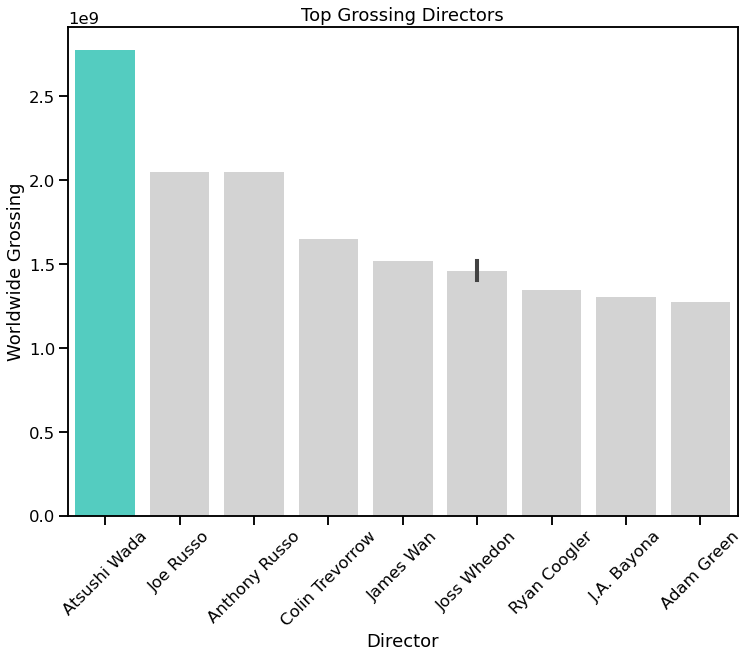

In [68]:
# plot worldwide_gross by top 10 directors
plt.figure(figsize=(12,9))
ax =sns.barplot(x = 'primary_name', y = 'worldwide_gross', 
            data = directors_title_budgets_df[0:10], 
            palette = custom_palette(directors_title_budgets_df['worldwide_gross']))

ax.set_title('Top Grossing Directors')
ax.set(xlabel='Director', ylabel= 'Worldwide Grossing')
plt.xticks(rotation=45);

**Method 2: Top 10 Grossing Directors Overall**

In [72]:
sorted_directors_df = directors_title_budgets_df.groupby(['primary_name']).sum().reset_index()
sorted_directors_df.sort_values(by='worldwide_gross', ascending=False, inplace=True)
sorted_directors_df

,primary_name,ordering,production_budget,domestic_gross,worldwide_gross,runtime_minutes,ROI,release_year,month_num
96,Anthony Russo,15.0,720000000.0,1.346647e+09,3.902606e+09,432.0,1258.975570,6048.0,13.0
732,Joe Russo,18.0,720000000.0,1.346647e+09,3.902606e+09,432.0,1258.975570,6048.0,13.0
272,Christopher Nolan,20.0,750000000.0,1.118801e+09,3.086180e+09,587.0,1253.635592,8053.0,32.0
823,Joss Whedon,15.0,615600000.0,1.105671e+09,2.969535e+09,427.0,879.998009,6025.0,18.0
1235,Peter Jackson,15.0,750000000.0,8.164902e+08,2.922948e+09,474.0,869.179218,6039.0,36.0
...,...,...,...,...,...,...,...,...,...
572,H.M. Coakley,5.0,750000.0,0.000000e+00,0.000000e+00,91.0,-100.000000,2016.0,1.0
1315,Rick Montano,5.0,30000.0,0.000000e+00,0.000000e+00,80.0,-100.000000,2013.0,12.0
297,Craig Wyting,5.0,25000.0,0.000000e+00,0.000000e+00,118.0,-100.000000,2015.0,4.0
290,Corey Grant,5.0,1800000.0,0.000000e+00,0.000000e+00,111.0,-100.000000,2012.0,2.0


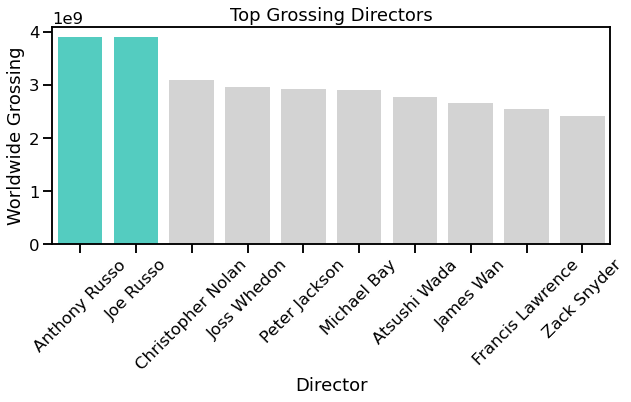

In [88]:
top_10_directors = sorted_directors_df[0:10]
plt.figure(figsize=(10,4))
ax = sns.barplot(x = 'primary_name', y = 'worldwide_gross', 
                 data = top_10_directors, 
                 palette = custom_palette(top_10_directors['worldwide_gross']))
ax.set_title('Top Grossing Directors')
ax.set(xlabel='Director', ylabel= 'Worldwide Grossing')
plt.xticks(rotation=45)
plt.savefig("images/top_directors.png");

Now let's also look at what movies Anthony and Joe Russo have directed.

In [89]:
directors_title_budgets_df[directors_title_budgets_df['primary_name']=='Christopher Nolan']

,nconst,primary_name,primary_profession,known_for_titles,tconst,ordering,category,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,month_num,quarter_released
2740,nm0634240,Christopher Nolan,"writer,producer,director","tt0482571,tt1375666,tt5013056,tt0154506",tt1345836,5.0,director,"Jul 20, 2012",The Dark Knight Rises,275000000.0,448139099.0,1.084439e+09,164.0,"Action,Thriller",294.341491,Action,Jul,2012.0,7.0,Q3
2739,nm0634240,Christopher Nolan,"writer,producer,director","tt0482571,tt1375666,tt5013056,tt0154506",tt1375666,5.0,director,"Jul 16, 2010",Inception,160000000.0,292576195.0,8.355246e+08,148.0,"Action,Adventure,Sci-Fi",422.202901,Action,Jul,2010.0,7.0,Q3
2741,nm0634240,Christopher Nolan,"writer,producer,director","tt0482571,tt1375666,tt5013056,tt0154506",tt0816692,5.0,director,"Nov 5, 2014",Interstellar,165000000.0,188017894.0,6.663794e+08,169.0,"Adventure,Drama,Sci-Fi",303.866288,Adventure,Nov,2014.0,11.0,Q4
2742,nm0634240,Christopher Nolan,"writer,producer,director","tt0482571,tt1375666,tt5013056,tt0154506",tt5013056,5.0,director,"Jul 21, 2017",Dunkirk,150000000.0,190068280.0,4.998374e+08,106.0,"Action,Drama,History",233.224912,Action,Jul,2017.0,7.0,Q3


Both directors directed action movies, specifically superhero franchises. We recommend Microsoft hires Anthony Russo, Joe Russo or Christopher Nolan to direct their films.

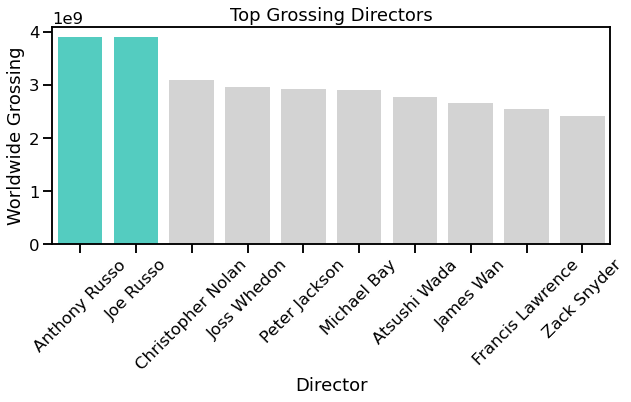

In [88]:
# make a graph of top adventure directors

top_action_directors = sorted_directors_df[0:10]
plt.figure(figsize=(10,4))
ax = sns.barplot(x = 'primary_name', y = 'worldwide_gross', 
                 data = top_10_directors, 
                 palette = custom_palette(top_10_directors['worldwide_gross']))
ax.set_title('Top Grossing Directors')
ax.set(xlabel='Director', ylabel= 'Worldwide Grossing')
plt.xticks(rotation=45)
plt.savefig("images/top_directors.png");

### Bonus Question: How does movie length affect ROI?

Another question we had was how movie length affects our profitability. Let's use a scatterplot to see if we can quickly see a relationship between ROI and runtime_minutes.

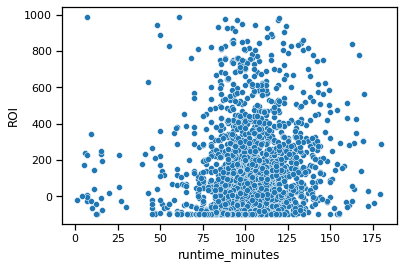

In [38]:
##plot runtime_minutes against ROI

ax = sns.scatterplot(data=filtered_title_budgets_df, x='runtime_minutes', y='ROI');

It's difficult to track any relationship between ROI and runtime minutes in this scatter plot. Let's see what happens if we run the same analysis after breaking run time into categories. We will run the describe method to see how we should break down our run time categories.

In [39]:
# run .describe() to determine categories of runtime_minutes data

filtered_title_budgets_df['runtime_minutes'].describe()

count    2137.000000
mean      101.950866
std        21.801452
min         1.000000
25%        90.000000
50%       101.000000
75%       113.000000
max       180.000000
Name: runtime_minutes, dtype: float64

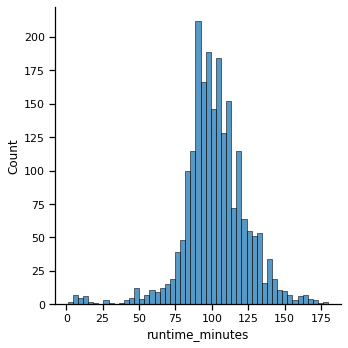

In [40]:
ax = sns.displot(data = filtered_title_budgets_df, x = 'runtime_minutes');

Based on the 25%-75% quartiles, we will categorize normal movie lengths as between 90 and 115 minutes. Anything shorter than 90 minutes will be categorized as 'short' and anything longer than 115 minutes will be categorized as 'long.

In [41]:
# create a function that categorizes each movie into movie lengths.

def movie_length_type(minutes):
    if (minutes < 90):
        return 'short'
    elif (minutes> 115):
        return 'long'
    else:
        return 'normal'

In [42]:
filtered_title_budgets_df['movie_length'] = filtered_title_budgets_df['runtime_minutes'].apply(movie_length_type)
filtered_title_budgets_df.head()

<ipython-input-42-fa03b4f16aa7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_title_budgets_df['movie_length'] = filtered_title_budgets_df['runtime_minutes'].apply(movie_length_type)


,release_date,movie,production_budget,domestic_gross,worldwide_gross,tconst,runtime_minutes,genres,ROI,primary_genre,release_month,release_year,month_num,quarter_released,movie_length
0,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,tt1775309,93.0,Horror,553.257713,Horror,Dec,2009,12,Q4,normal
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,tt1298650,136.0,"Action,Adventure,Fantasy",154.667286,Action,May,2011,5,Q2,long
2,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,tt6565702,113.0,"Action,Adventure,Sci-Fi",-57.210757,Action,Jun,2019,6,Q2,normal
3,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,tt2395427,141.0,"Action,Adventure,Sci-Fi",324.384139,Action,May,2015,5,Q2,long
6,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,tt4154756,149.0,"Action,Adventure,Sci-Fi",582.711400,Action,Apr,2018,4,Q2,long


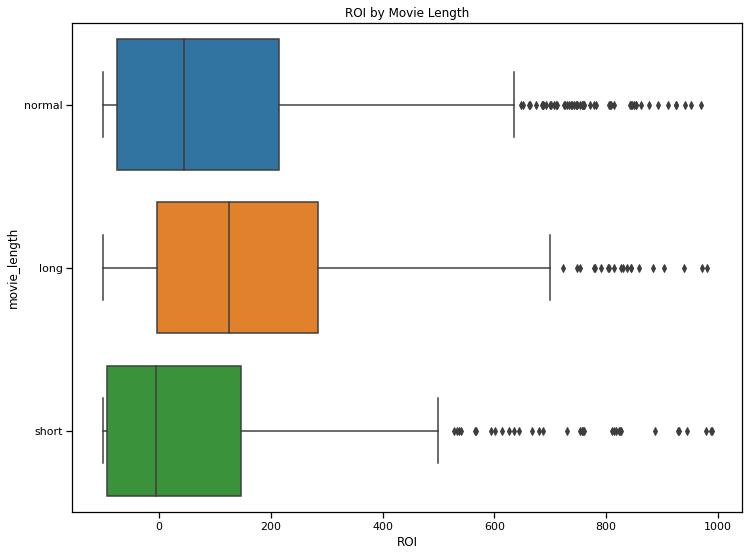

In [43]:
plt.figure(figsize=(12,9))
ax = sns.boxplot(data=filtered_title_budgets_df, x='ROI', y='movie_length')
ax.set_title('ROI by Movie Length');

In general, it looks like long movies perform slightly better from an ROI perspective, however, the evidence needs to be further investigated before a conclusion can be made.

<Figure size 864x648 with 0 Axes>

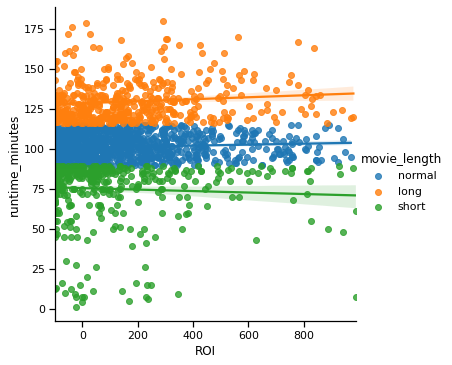

In [44]:
plt.figure(figsize=(12,9))
sns.lmplot(x='ROI', y='runtime_minutes', data=filtered_title_budgets_df,
          hue='movie_length');

In [45]:
#b = sns.boxplot(x=tips["total_bill"])
# b.axes.set_title("Title",fontsize=50)
# b.set_xlabel("X Label",fontsize=30)
# b.set_ylabel("Y Label",fontsize=20)
# b.tick_params(labelsize=5)
# sns.plt.show()q